In [1]:
#import the libaries 
import tweepy
from textblob import TextBlob
from wordcloud import wordcloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [2]:

consumerKey = 'qjO6aJwA258lMTWmCZSDIi6vW'
consumerSecret = 'OFtKBpUZLKnSD0e6HbvdMFVrjIxO0jIdbwbSD0zKdwC44xvEyW'
accessToken = '799747129250107392-grMj8XeQzBcbUqcevCiU1WfpdvpdqvW'
accessTokenSecret = 'lKpSXDHQQjXyyRln7pxKo47KUzZY0WOgCewoX2ZDzxZsm'


In [3]:
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
authenticate.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(authenticate, wait_on_rate_limit=True)


In [4]:
#gather 100-200 tweets about Marcus Rashford and filter out any RT
search_term = '#rashford -filter:retweets'
#cursor object
tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since= '2018-11-01', tweet_mode='extended').items(200)
#store tweets to get in a variable to get full text
all_tweets = [tweet.full_text for tweet in tweets] 

In [5]:
df = pd.DataFrame(all_tweets, columns=['Tweets'])
df.head(5)

,Tweets
0,*Players Transfer Rumours*\n🔴🔴🔴According to Sp...
1,@Johnjam10John As I written ad nausem it all d...
2,Is it true #Rashford and #Lingard give there s...
3,"Overhyped, short on ability the lot #Rashford ..."
4,@SibsMUFC I think he’s a better politician tha...


In [6]:
#function to clean tweets
def cleanTwt(twt):
  twt = re.sub('#rashford', 'rashford', twt) #removes the # from rashford
  twt = re.sub('#Rashford', 'Rashford', twt) #removes the # from Rashford
  twt = re.sub('#[A-Za-z0-9]+', '',  twt) #removes any string with a #
  twt = re.sub('\\n', '', twt) #removes the backslash n 
  twt = re.sub('https?:\/\/\S+','', twt) #removes any hyperlink
  return twt

In [7]:
#cleaned up tweets 
df['Cleaned_Tweets'] = df['Tweets'].apply(cleanTwt)
#Dataframe
df.head(10)

,Tweets,Cleaned_Tweets
0,*Players Transfer Rumours*\n🔴🔴🔴According to Sp...,*Players Transfer Rumours*🔴🔴🔴According to Span...
1,@Johnjam10John As I written ad nausem it all d...,@Johnjam10John As I written ad nausem it all d...
2,Is it true #Rashford and #Lingard give there s...,Is it true Rashford and give there shirts awa...
3,"Overhyped, short on ability the lot #Rashford ...","Overhyped, short on ability the lot Rashford ..."
4,@SibsMUFC I think he’s a better politician tha...,@SibsMUFC I think he’s a better politician tha...
5,@NORTH_BEAR_ @BootstrapCook @MartinSLewis @Mar...,@NORTH_BEAR_ @BootstrapCook @MartinSLewis @Mar...
6,@Everton @ManUtd...You know I have to comment ...,@Everton @ManUtd...You know I have to comment ...
7,We need to stop rewarding players that don't w...,We need to stop rewarding players that don't w...
8,@uchejombo As quick as possible. And I hope #S...,@uchejombo As quick as possible. And I hope ...
9,"@LJxmes The club allowed players like him, #Ra...","@LJxmes The club allowed players like him, Ras..."


In [8]:
import textblob
#create function to get subjectivity 
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
#create a function to get polarity 
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#2 new columns 
df['Subjectivity'] = df['Cleaned_Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Cleaned_Tweets'].apply(getPolarity)

#show the tweets in the dataframe
df.head(10)

,Tweets,Cleaned_Tweets,Subjectivity,Polarity
0,*Players Transfer Rumours*\n🔴🔴🔴According to Sp...,*Players Transfer Rumours*🔴🔴🔴According to Span...,0.000000,0.000000
1,@Johnjam10John As I written ad nausem it all d...,@Johnjam10John As I written ad nausem it all d...,0.291667,0.200000
2,Is it true #Rashford and #Lingard give there s...,Is it true Rashford and give there shirts awa...,0.650000,0.350000
3,"Overhyped, short on ability the lot #Rashford ...","Overhyped, short on ability the lot Rashford ...",0.650000,0.450000
4,@SibsMUFC I think he’s a better politician tha...,@SibsMUFC I think he’s a better politician tha...,0.500000,0.500000
5,@NORTH_BEAR_ @BootstrapCook @MartinSLewis @Mar...,@NORTH_BEAR_ @BootstrapCook @MartinSLewis @Mar...,0.000000,0.000000
6,@Everton @ManUtd...You know I have to comment ...,@Everton @ManUtd...You know I have to comment ...,0.516667,0.070833
7,We need to stop rewarding players that don't w...,We need to stop rewarding players that don't w...,0.525000,0.393750
8,@uchejombo As quick as possible. And I hope #S...,@uchejombo As quick as possible. And I hope ...,0.750000,0.166667
9,"@LJxmes The club allowed players like him, #Ra...","@LJxmes The club allowed players like him, Ras...",0.438889,-0.377778


In [9]:
#create a function to compute the negative, neutral and positive analysis 

def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


In [10]:
#create a column to get the text sentiment 
df['Sentiment'] = df['Polarity'].apply(getSentiment)
#show the data
df.head(100)

,Tweets,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,*Players Transfer Rumours*\n🔴🔴🔴According to Sp...,*Players Transfer Rumours*🔴🔴🔴According to Span...,0.000000,0.00,Neutral
1,@Johnjam10John As I written ad nausem it all d...,@Johnjam10John As I written ad nausem it all d...,0.291667,0.20,Positive
2,Is it true #Rashford and #Lingard give there s...,Is it true Rashford and give there shirts awa...,0.650000,0.35,Positive
3,"Overhyped, short on ability the lot #Rashford ...","Overhyped, short on ability the lot Rashford ...",0.650000,0.45,Positive
4,@SibsMUFC I think he’s a better politician tha...,@SibsMUFC I think he’s a better politician tha...,0.500000,0.50,Positive
...,...,...,...,...,...
95,SELL GBP/JPY\n BELOW 166.80 \n TARGET 1-166....,SELL GBP/JPY BELOW 166.80 TARGET 1-166.60 T...,0.000000,0.00,Neutral
96,Appalling performance levels and woeful decisi...,Appalling performance levels and woeful decisi...,0.900000,-0.35,Negative
97,Who will fill these seats next season?\n#manch...,Who will fill these seats next season? ...,0.000000,0.00,Neutral
98,@ESPNFC Should get put on a free transfer and ...,@ESPNFC Should get put on a free transfer and ...,0.600000,0.10,Positive


In [11]:
df.shape[0]

353

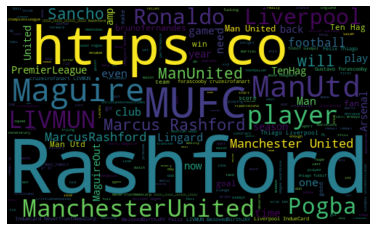

In [12]:
from pandas.core.common import random_state
#Word Cloud
allwords = ' '.join(twts for twts in df['Tweets'])
wordCloud = wordcloud.WordCloud(width = 500, height=300, random_state = 21, max_font_size = 119).generate(allwords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()


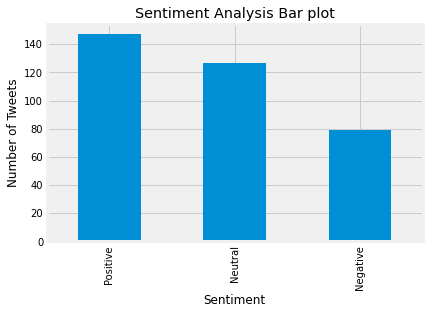

In [13]:
#barchart to show the count of positive, neutral and negative sentiment 
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()